In [ ]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)
# 'list' object has no attribute 'split'

In [2]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


단어 10개짜리 작은 딕셔너리가 만들어졌습니다.  
하지만 우리가 가진 텍스트 데이터를 숫자로 바꿔 보려고 하는데,  
텍스트를 숫자로 바꾸려면 위의 딕셔너리가 {텍스트:인덱스} 구조여야 합니다

In [ ]:
for index, word in index_to_word.items():
    word:index

{word:index for index, word in index_to_word.items()}

In [3]:
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


index_to_word={}  
index_to_word[0]='<PAD>'
    
----    
word_to_index={word:index}

In [9]:
print(word_to_index['feel']) 

4


In [24]:
word_to_index

{'<PAD>': 0,
 '<BOS>': 1,
 '<UNK>': 2,
 'i': 3,
 'feel': 4,
 'hungry': 5,
 'eat': 6,
 'lunch': 7,
 'now': 8,
 'happy': 9}

### 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수

In [25]:
'i eat lunch'.split()

['i', 'eat', 'lunch']

In [26]:
word_to_index["i"]

3

In [27]:
word_to_index['<BOS>']

1

for word in sentence.split():
    if word in word_to_index:
        word_to_index[word]
    
    else: 
        word_to_index['<UNK>']

In [4]:
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

In [18]:
print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


### 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수 

In [ ]:
for sentence in sentences:
    get_encoded_sentence(sentence, word_to_index)
    
 -> for word in sentence.split():
        if word in word_to_index:
            word_to_index[word]
    
        else: 
            word_to_index['<UNK>']

In [5]:
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

In [19]:
# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


### 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수

In [28]:
get_decoded_sentence([1, 3, 4, 5])
-> encoded_sentence
'i feel hungry'-> [1, 3, 4, 5]

NameError: name 'encoded_sentence' is not defined

In [30]:
3 in index_to_word

True

In [31]:
index_to_word[3]

'i'

In [ ]:
        # in [3, 4, 5]
for index in encoded_sentence[1:]:
    if index in index_to_word:
        index_to_word[index]
    else: 
        '<UNK>'    

' '.join()

In [6]:
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

In [21]:
print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


### 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수

In [ ]:
[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]
->[1, 3, 4, 5], 
[1, 3, 6, 7], 
[1, 8, 3, 4, 9]
for encoded_sentence in encoded_sentences:
    get_decoded_sentence(encoded_sentence, index_to_word)

for index in encoded_sentence[1:]:
    if index in index_to_word:
        index_to_word[index]
    else: 
        '<UNK>'    

' '.join()

In [8]:
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [23]:
# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


In [7]:
import numpy as np
import tensorflow as tf
import os

`tf.keras.layers.Embedding`  
 (
    __input_dim,
    output_dim__,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    __mask_zero=False__,
    input_length=None,
    **kwargs,
)
Docstring:     
Turns positive integers (indexes) into dense vectors of fixed size.

In [10]:
# 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다. 
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, 
                                      output_dim=word_vector_dim, 
                                      mask_zero=True)

In [ ]:
# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')

In [13]:
raw_inputs

array([list([1, 3, 4, 5]), list([1, 3, 6, 7]), list([1, 8, 3, 4, 9])],
      dtype=object)

In [ ]:
output = embedding(raw_inputs)
print(output)

`ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).`

주의해야 할 점이 있습니다.  
Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다.  
raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5  
[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]

---
Tensorflow에서는  
`tf.keras.preprocessing.sequence.pad_sequences`라는 편리한 함수를 통해  
문장 벡터 뒤에 패딩(`<PAD>`)을 추가하여  
길이를 일정하게 맞춰주는 기능을 제공합니다.

---
`tf.keras.preprocessing.sequence.pad_sequences`  
(
    __sequences,
    maxlen=None,
    dtype='int32',
    padding='pre'__,
    truncating='pre',
    value=0.0,
)
Docstring:
Pads sequences to the same length.

In [14]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)

In [36]:
raw_inputs

array([[1, 3, 4, 5, 0],
       [1, 3, 6, 7, 0],
       [1, 8, 3, 4, 9]], dtype=int32)

짧은 문장 뒤쪽이 0으로 채워지는 것을 확인할 수 있습니다.  
`<PAD>` 가 0에 매핑되어 있다는 걸 기억하세요.

In [41]:
word_to_index

{'<PAD>': 0,
 '<BOS>': 1,
 '<UNK>': 2,
 'i': 3,
 'feel': 4,
 'hungry': 5,
 'eat': 6,
 'lunch': 7,
 'now': 8,
 'happy': 9}

BOS -> Beginning Of Sentence  
EOS -> End Of Sentence.

In [40]:
len(word_to_index)

10

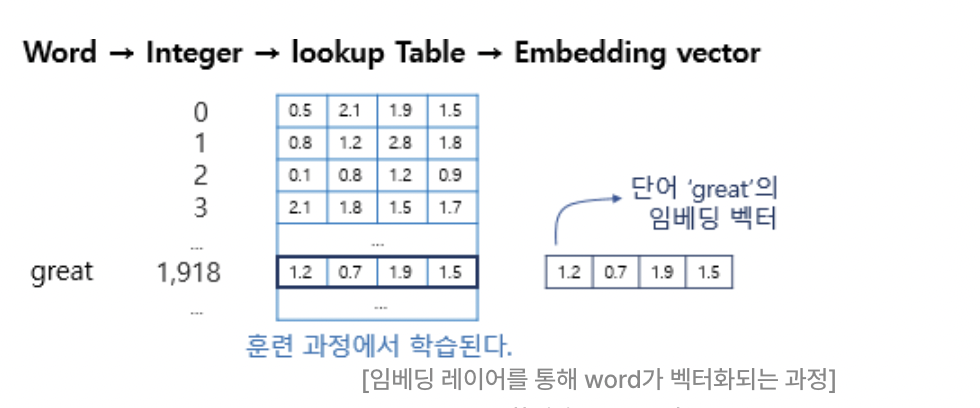

In [15]:
len(word_to_index)  

10

In [16]:
vocab_size = len(word_to_index)  
# 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4 # 표현을 담을 수 있는 크기.    
# 그림과 같이 4차원의 워드 벡터를 가정합니다.

In [12]:
embedding = tf.keras.layers.Embedding(input_dim=vocab_size, 
                                      output_dim=word_vector_dim, 
                                      mask_zero=True)

In [14]:
sentences

['i feel hungry', 'i eat lunch', 'now i feel happy']

In [15]:
word_to_index

{'<PAD>': 0,
 '<BOS>': 1,
 '<UNK>': 2,
 'i': 3,
 'feel': 4,
 'hungry': 5,
 'eat': 6,
 'lunch': 7,
 'now': 8,
 'happy': 9}

In [13]:
# tf.keras.preprocessing.sequence.pad_sequences를 통해 
# word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)

In [14]:
raw_inputs
# '<BOS>': 1

array([list([1, 3, 4, 5]), list([1, 3, 6, 7]), list([1, 8, 3, 4, 9])],
      dtype=object)

In [15]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)

In [16]:
raw_inputs

array([[1, 3, 4, 5, 0],
       [1, 3, 6, 7, 0],
       [1, 8, 3, 4, 9]], dtype=int32)

In [18]:
raw_inputs.shape
# 'i feel hungry', 
# 'i eat lunch', 
# 'now i feel happy'

(3, 5)

embedding = `tf.keras.layers.Embedding`(input_dim=vocab_size,   
                                      output_dim=word_vector_dim,   
                                      mask_zero=True)  

In [26]:
tf.keras.layers.Embedding(input_shape=raw_inputs,
                          input_dim=vocab_size, 
                          output_dim=word_vector_dim, 
                          mask_zero=True)

In [23]:
tf.keras.layers.Embedding(
                          input_dim=vocab_size, 
                          output_dim=word_vector_dim, 
                          mask_zero=True)(raw_inputs)

<tf.Tensor: shape=(3, 5, 4), dtype=float32, numpy=
array([[[ 0.01241262, -0.0352671 ,  0.03492648, -0.03667656],
        [-0.03727664,  0.00094156, -0.0014346 , -0.04261315],
        [ 0.02377297, -0.02034795, -0.04332955, -0.03965603],
        [ 0.00711654, -0.04184167, -0.02576877,  0.01576474],
        [-0.01843469,  0.03386742,  0.0407302 , -0.01899507]],

       [[ 0.01241262, -0.0352671 ,  0.03492648, -0.03667656],
        [-0.03727664,  0.00094156, -0.0014346 , -0.04261315],
        [-0.03051241, -0.03913909,  0.03003763,  0.0497084 ],
        [-0.04555739,  0.03018131, -0.03385304, -0.0475621 ],
        [-0.01843469,  0.03386742,  0.0407302 , -0.01899507]],

       [[ 0.01241262, -0.0352671 ,  0.03492648, -0.03667656],
        [ 0.03639258, -0.00206953,  0.00066341,  0.01725972],
        [-0.03727664,  0.00094156, -0.0014346 , -0.04261315],
        [ 0.02377297, -0.02034795, -0.04332955, -0.03965603],
        [-0.00089086, -0.03132497, -0.03757899,  0.01329336]]],
      dtype=f

In [24]:
output = embedding(raw_inputs)

In [39]:
print(output)

tf.Tensor(
[[[ 3.6675882e-02  2.0802822e-02 -4.3628480e-02 -3.1017244e-02]
  [-5.1639229e-04 -4.3579150e-02  4.2386580e-02  2.2935223e-02]
  [-2.3560941e-02 -1.3828147e-02 -6.0309395e-03 -1.8259298e-02]
  [-2.1882368e-02 -1.5943360e-02  9.5594674e-05 -1.4181685e-02]
  [ 9.7403154e-03 -3.2358393e-03 -1.9200254e-02  4.7473159e-02]]

 [[ 3.6675882e-02  2.0802822e-02 -4.3628480e-02 -3.1017244e-02]
  [-5.1639229e-04 -4.3579150e-02  4.2386580e-02  2.2935223e-02]
  [-3.6044382e-02  2.6421379e-02  3.9751384e-02  3.6670614e-02]
  [-3.0252850e-02  7.8021400e-03 -1.7888177e-02 -4.3089416e-02]
  [ 9.7403154e-03 -3.2358393e-03 -1.9200254e-02  4.7473159e-02]]

 [[ 3.6675882e-02  2.0802822e-02 -4.3628480e-02 -3.1017244e-02]
  [-1.3268519e-02  2.4640072e-02  1.4262069e-02 -4.1768178e-03]
  [-5.1639229e-04 -4.3579150e-02  4.2386580e-02  2.2935223e-02]
  [-2.3560941e-02 -1.3828147e-02 -6.0309395e-03 -1.8259298e-02]
  [-1.9770492e-02 -2.5791561e-02  2.2630822e-02  2.1702956e-02]]], shape=(3, 5, 4), dtype

3은 입력문장 개수,   
5는 입력문장의 최대 길이,   
4는 워드 벡터의 차원 수  

In [44]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                    word_vector_dim, 
                                    input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


시퀀스 자료형과 RNN에 대해 조금더 쉽게 이해하고 싶다면 아래 링크(24분~55분)

In [47]:
vocab_size # len(word_to_index)  

10

In [48]:
word_vector_dim # 4

4

`tf.keras.layers.GlobalMaxPooling1D`(*args, **kwargs)   
Global max pooling operation for 1D temporal data.

Downsamples the input representation by taking the maximum value over
the time dimension.

In [45]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                    word_vector_dim, 
                                    input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
# 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

아주 간단히는 GlobalMaxPooling1D() 레이어 하나만 사용하는 방법도 생각해 볼 수 있습니다.   
이 방식은 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여  
그것으로 문장의 긍정/부정을 평가하는 방식이라고 생각할 수 있는데,  
의외로 성능이 잘 나올 수도 있습니다.

In [46]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                    word_vector_dim, 
                                    input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
# 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


이 외에도 1-D CNN과 RNN 레이어를 섞어 쓴다거나, FFN(FeedForward Network) 레이어만으로 구성하거나,  
혹은 최근 각광받고 있는 Transformer 레이어를 쓰는 등 매우 다양한 시도를 해볼 수 있습니다.

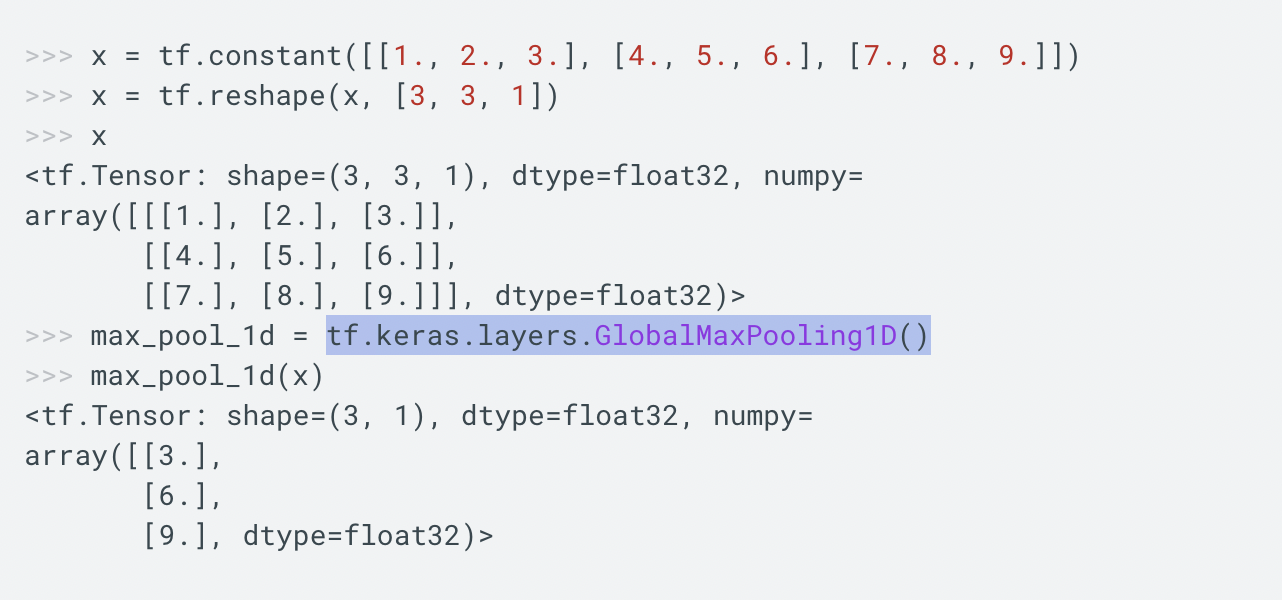